In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [2]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_4_lat.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_4_lat.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

read_x_data
read_y_data
[[-1.00901681  0.29679417 -0.08563573 -0.97388892  0.28921222 -0.0662603
  -0.37344024  0.12355706 -0.01399191 -0.59876742  0.19760429 -0.00185156
  -1.00398709  0.32061918 -0.04832024 -0.95216501  0.28265648 -0.0638499
  -0.9334568   0.26823752 -0.05543414 -1.03193563  0.27726761 -0.11295288
  -1.10520987  0.35590611 -0.05583592 -1.03836211  0.33191525 -0.05323987
  -0.98781711  0.30041034 -0.06865264 -0.9567859   0.27526951 -0.07071635
  -0.95931839  0.26640576 -0.07235861]
 [-0.98023846  0.26538804 -0.08488545 -0.95953854  0.32819374 -0.09247271
  -0.79749666  0.25362338 -0.38703258 -0.52547339  0.17344927 -0.00418763
  -1.01267324  0.31339511 -0.06790584 -0.94086327  0.27067603 -0.06280282
  -0.93196397  0.28179654 -0.04683762 -1.00694766  0.31544141 -0.08664384
  -1.14506187  0.3166023  -0.1490528  -1.05449244  0.31904329 -0.08851762
  -0.97547715  0.27965143 -0.07926699 -0.94300099  0.2676601  -0.06057048
  -0.95486926  0.28838041 -0.05726004]]
[[ -17.    

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

(3072, 39) (3072, 7) training data size
(1024, 39) (1024, 7) Validation data size


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm


input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()


Model: "Rectangular_4by4_sensor_concept_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 39)]              0         
_________________________________________________________________
dense (Dense)                (None, 700)               28000     
_________________________________________________________________
dense_1 (Dense)              (None, 700)               490700    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 4907      
Total params: 523,607
Trainable params: 523,607
Non-trainable params: 0
_________________________________________________________________


In [5]:
history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))
#history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=1, callbacks=my_callbacks, validation_data=(xval_scale,yval_scale))


Epoch 1/20
96/96 - 1s - loss: 0.2384 - val_loss: 0.2035
Epoch 2/20
96/96 - 1s - loss: 0.1845 - val_loss: 0.1710
Epoch 3/20
96/96 - 1s - loss: 0.1600 - val_loss: 0.1474
Epoch 4/20
96/96 - 1s - loss: 0.1430 - val_loss: 0.1438
Epoch 5/20
96/96 - 1s - loss: 0.1356 - val_loss: 0.1378
Epoch 6/20
96/96 - 1s - loss: 0.1248 - val_loss: 0.1292
Epoch 7/20
96/96 - 0s - loss: 0.1167 - val_loss: 0.1239
Epoch 8/20
96/96 - 0s - loss: 0.1083 - val_loss: 0.1158
Epoch 9/20
96/96 - 1s - loss: 0.1023 - val_loss: 0.1117
Epoch 10/20
96/96 - 1s - loss: 0.0991 - val_loss: 0.1134
Epoch 11/20
96/96 - 1s - loss: 0.0963 - val_loss: 0.1162
Epoch 12/20
96/96 - 0s - loss: 0.0948 - val_loss: 0.1168
Epoch 13/20
96/96 - 1s - loss: 0.0883 - val_loss: 0.1052
Epoch 14/20
96/96 - 1s - loss: 0.0865 - val_loss: 0.1044
Epoch 15/20
96/96 - 0s - loss: 0.0879 - val_loss: 0.0976
Epoch 16/20
96/96 - 1s - loss: 0.0857 - val_loss: 0.1010
Epoch 17/20
96/96 - 1s - loss: 0.0808 - val_loss: 0.0955
Epoch 18/20
96/96 - 1s - loss: 0.0784 - 

In [6]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_5_lat.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_5_lat.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()

history_2 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))



read_x_data
read_y_data
[[-1.00901681  0.29679417 -0.08563573 -0.97388892  0.28921222 -0.0662603
  -0.37344024  0.12355706 -0.01399191 -0.59876742  0.19760429 -0.00185156
  -1.00398709  0.32061918 -0.04832024 -0.95216501  0.28265648 -0.0638499
  -0.9334568   0.26823752 -0.05543414 -1.03193563  0.27726761 -0.11295288
  -1.10520987  0.35590611 -0.05583592 -1.03836211  0.33191525 -0.05323987
  -0.98781711  0.30041034 -0.06865264 -0.9567859   0.27526951 -0.07071635
  -0.95931839  0.26640576 -0.07235861]
 [-0.98836305  0.27067152 -0.09028607 -0.96738877  0.32452781 -0.08436246
  -0.66492566  0.17587357 -0.62967133 -0.54999814  0.1815278  -0.00326393
  -1.01130939  0.31629536 -0.06232372 -0.9438729   0.27323179 -0.06404359
  -0.93160064  0.27691075 -0.04796361 -1.00585762  0.28769086 -0.08180055
  -1.14943396  0.34447756 -0.1169303  -1.05270035  0.3252866  -0.07783491
  -0.98008612  0.28561229 -0.07801196 -0.94556221  0.26725919 -0.06429194
  -0.95405513  0.27887607 -0.05839654]]
[[ -17.   -

In [7]:
##for 6p
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_6_lat.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_6_lat.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()

history_3 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))


read_x_data
read_y_data
[[-1.00901681  0.29679417 -0.08563573 -0.97388892  0.28921222 -0.0662603
  -0.37344024  0.12355706 -0.01399191 -0.59876742  0.19760429 -0.00185156
  -1.00398709  0.32061918 -0.04832024 -0.95216501  0.28265648 -0.0638499
  -0.9334568   0.26823752 -0.05543414 -1.03193563  0.27726761 -0.11295288
  -1.10520987  0.35590611 -0.05583592 -1.03836211  0.33191525 -0.05323987
  -0.98781711  0.30041034 -0.06865264 -0.9567859   0.27526951 -0.07071635
  -0.95931839  0.26640576 -0.07235861]
 [-0.99353841  0.27558596 -0.09166963 -0.97092569  0.3203529  -0.07917995
   0.34224646  0.261389   -0.66851007 -0.56217119  0.1855393  -0.00286086
  -1.01014583  0.31761127 -0.05918254 -0.9456748   0.27498996 -0.0644563
  -0.93154655  0.27434853 -0.04906593 -1.00507737  0.27286898 -0.08632884
  -1.14328162  0.35199822 -0.09955319 -1.0505492   0.32775841 -0.07197371
  -0.98237877  0.2890406  -0.07665621 -0.94751782  0.26792534 -0.06626923
  -0.95390393  0.27402607 -0.06032563]]
[[ -17.   -1

In [8]:
##for 7p
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_7_lat.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_7_lat.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()

history_4 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))


read_x_data
read_y_data
[[-1.00901681  0.29679417 -0.08563573 -0.97388892  0.28921222 -0.0662603
  -0.37344024  0.12355706 -0.01399191 -0.59876742  0.19760429 -0.00185156
  -1.00398709  0.32061918 -0.04832024 -0.95216501  0.28265648 -0.0638499
  -0.9334568   0.26823752 -0.05543414 -1.03193563  0.27726761 -0.11295288
  -1.10520987  0.35590611 -0.05583592 -1.03836211  0.33191525 -0.05323987
  -0.98781711  0.30041034 -0.06865264 -0.9567859   0.27526951 -0.07071635
  -0.95931839  0.26640576 -0.07235861]
 [-0.99684313  0.27920321 -0.0918185  -0.97265513  0.31664906 -0.07582609
   0.1723563  -0.0380962  -0.15734532 -0.56946623  0.18794375 -0.00263603
  -1.00926087  0.3183402  -0.05718261 -0.94685245  0.27622355 -0.06459654
  -0.93160993  0.27284054 -0.0499502  -1.00613799  0.26620043 -0.0917225
  -1.13757971  0.35471494 -0.08958233 -1.04881896  0.32899839 -0.06833268
  -0.98369509  0.29121649 -0.07555899 -0.94895239  0.26869509 -0.06742349
  -0.95407927  0.27134941 -0.06202637]]
[[ -17.     

read_x_data
read_y_data
[[-1.00901681  0.29679417 -0.08563573 -0.97388892  0.28921222 -0.0662603
  -0.37344024  0.12355706 -0.01399191 -0.59876742  0.19760429 -0.00185156
  -1.00398709  0.32061918 -0.04832024 -0.95216501  0.28265648 -0.0638499
  -0.9334568   0.26823752 -0.05543414 -1.03193563  0.27726761 -0.11295288
  -1.10520987  0.35590611 -0.05583592 -1.03836211  0.33191525 -0.05323987
  -0.98781711  0.30041034 -0.06865264 -0.9567859   0.27526951 -0.07071635
  -0.95931839  0.26640576 -0.07235861]
 [-0.99906895  0.28185339 -0.09157819 -0.97355674  0.31355153 -0.07357834
  -0.01647488  0.01146429 -0.08057034 -0.57433085  0.18954731 -0.00249285
  -1.00858441  0.31879617 -0.05580102 -0.94767615  0.27712565 -0.064633
  -0.93171176  0.27187342 -0.05064341 -1.00796497  0.26347969 -0.09611555
  -1.13310736  0.35588454 -0.08323239 -1.04747496  0.3297169  -0.0658644
  -0.9845309   0.29270753 -0.07469773 -0.95002528  0.26938444 -0.06815486
  -0.95437091  0.26975794 -0.06339435]]
[[ -17.       

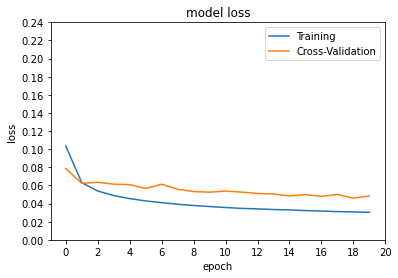

In [9]:
##for 8p
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_8_lat.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_8_lat.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()

history_5 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training ', 'Cross-Validation'], loc='upper right')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.25, 0.02))
plt.savefig('Model_Loss_8p_mae.png', dpi=1200)
plt.show()


read_x_data
read_y_data
[[-1.00901681  0.29679417 -0.08563573 -0.97388892  0.28921222 -0.0662603
  -0.37344024  0.12355706 -0.01399191 -0.59876742  0.19760429 -0.00185156
  -1.00398709  0.32061918 -0.04832024 -0.95216501  0.28265648 -0.0638499
  -0.9334568   0.26823752 -0.05543414 -1.03193563  0.27726761 -0.11295288
  -1.10520987  0.35590611 -0.05583592 -1.03836211  0.33191525 -0.05323987
  -0.98781711  0.30041034 -0.06865264 -0.9567859   0.27526951 -0.07071635
  -0.95931839  0.26640576 -0.07235861]
 [-0.99906895  0.28185339 -0.09157819 -0.97355674  0.31355153 -0.07357834
  -0.01647488  0.01146429 -0.08057034 -0.57433085  0.18954731 -0.00249285
  -1.00858441  0.31879617 -0.05580102 -0.94767615  0.27712565 -0.064633
  -0.93171176  0.27187342 -0.05064341 -1.00796497  0.26347969 -0.09611555
  -1.13310736  0.35588454 -0.08323239 -1.04747496  0.3297169  -0.0658644
  -0.9845309   0.29270753 -0.07469773 -0.95002528  0.26938444 -0.06815486
  -0.95437091  0.26975794 -0.06339435]]
[[ -17.       

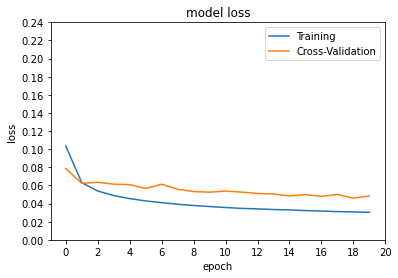

In [15]:
##for 8p
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_8_lat.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_8_lat.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()

history_6 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training ', 'Cross-Validation'], loc='upper right')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.25, 0.02))
plt.savefig('Model_Loss_8p_mae.png', dpi=1200)
plt.show()


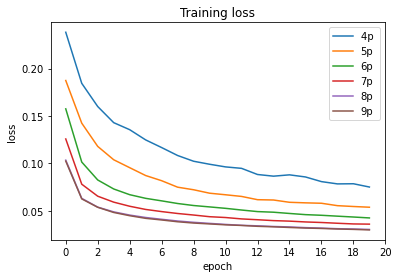

In [16]:
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.plot(history_4.history['loss'])
plt.plot(history_5.history['loss'])
plt.plot(history_6.history['loss'])
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['4p ', '5p', '6p','7p','8p','9p'], loc='upper right')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
#plt.yticks(np.arange(0.0, 0.25, 0.02))
plt.savefig('Complete_Training_Loss_mae_hexagon.png', dpi=1200)
plt.show()

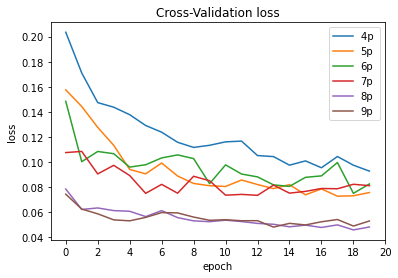

In [18]:
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_3.history['val_loss'])
plt.plot(history_4.history['val_loss'])
plt.plot(history_5.history['val_loss'])
plt.plot(history_6.history['val_loss'])
plt.title('Cross-Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['4p ', '5p', '6p','7p','8p','9p'], loc='upper right')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
#plt.yticks(np.arange(0.0, 0.25, 0.02))
plt.savefig('Complete_Validation_Loss_mae_hexagon.png', dpi=1200)
plt.show()